In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\GASTO\Downloads\second_hand_cars.csv")

In [3]:
data.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,NaN
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


In [4]:
data.shape

(2500, 16)

# descriptive stat

In [5]:
data.describe()

,Make Year,Mileage,Price
count,2500.000000,2500.000000,2500.000000
mean,2019.521600,104777.792000,608120.897600
std,2.894146,55544.487467,231056.126713
min,2015.000000,10010.000000,200176.000000
25%,2017.000000,56313.000000,407791.000000
50%,2020.000000,104209.500000,612012.500000
75%,2022.000000,152149.250000,804567.000000
max,2024.000000,199755.000000,999826.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

# checking for missingness

In [7]:
data.isnull().sum()

Company Name                  0
Car Name                      0
Variant                     262
Fuel Type                     0
Tyre Condition                0
Make Year                     0
Owner Type                    0
Registration Number           0
Mileage                       0
Price                         0
Transmission Type             0
Body Color                    0
Service Record                0
Insurance                     0
Registration Certificate      0
Accessories                 482
dtype: int64

# handling missingness

In [8]:
data["Variant"].fillna(data["Variant"].mode()[0], inplace=True)
data["Accessories"].fillna(data["Accessories"].mode()[0], inplace=True)

C:\Users\GASTO\AppData\Local\Temp\ipykernel_15500\1856056616.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Variant"].fillna(data["Variant"].mode()[0], inplace=True)
C:\Users\GASTO\AppData\Local\Temp\ipykernel_15500\1856056616.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [9]:
data.isnull().sum()

Company Name                0
Car Name                    0
Variant                     0
Fuel Type                   0
Tyre Condition              0
Make Year                   0
Owner Type                  0
Registration Number         0
Mileage                     0
Price                       0
Transmission Type           0
Body Color                  0
Service Record              0
Insurance                   0
Registration Certificate    0
Accessories                 0
dtype: int64

In [10]:
data.dtypes

Company Name                object
Car Name                    object
Variant                     object
Fuel Type                   object
Tyre Condition              object
Make Year                    int64
Owner Type                  object
Registration Number         object
Mileage                      int64
Price                        int64
Transmission Type           object
Body Color                  object
Service Record              object
Insurance                   object
Registration Certificate    object
Accessories                 object
dtype: object

# check for uniqueness

In [11]:
unique_counts = data.nunique()
unique_counts

Company Name                  10
Car Name                      10
Variant                        9
Fuel Type                      3
Tyre Condition                 3
Make Year                     10
Owner Type                     3
Registration Number         2500
Mileage                     2483
Price                       2495
Transmission Type              3
Body Color                     8
Service Record               849
Insurance                      2
Registration Certificate       2
Accessories                  203
dtype: int64

In [12]:
total_rows = len(data)

# checking for the percentage of uniqueness

In [13]:
unique_percentage = (unique_counts / total_rows) * 100
unique_percentage

Company Name                  0.40
Car Name                      0.40
Variant                       0.36
Fuel Type                     0.12
Tyre Condition                0.12
Make Year                     0.40
Owner Type                    0.12
Registration Number         100.00
Mileage                      99.32
Price                        99.80
Transmission Type             0.12
Body Color                    0.32
Service Record               33.96
Insurance                     0.08
Registration Certificate      0.08
Accessories                   8.12
dtype: float64

# Encoding

- used one hot encoding for data with less unique variables


In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
data= pd.get_dummies(
    data,  drop_first=True
)

In [16]:
data.head()

,Make Year,Mileage,Price,Company Name_Ford,Company Name_Honda,Company Name_Hyundai,Company Name_Kia,Company Name_Maruti Suzuki,Company Name_Nissan,Company Name_Renault,...,"Accessories_Sunroof, Leather Seats, Music System, GPS","Accessories_Sunroof, Music System","Accessories_Sunroof, Music System, Alloy Wheels","Accessories_Sunroof, Music System, Alloy Wheels, GPS","Accessories_Sunroof, Music System, Alloy Wheels, Leather Seats","Accessories_Sunroof, Music System, GPS","Accessories_Sunroof, Music System, GPS, Alloy Wheels","Accessories_Sunroof, Music System, GPS, Leather Seats","Accessories_Sunroof, Music System, Leather Seats","Accessories_Sunroof, Music System, Leather Seats, GPS"
0,2018,52798,759107,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2020,43412,505071,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022,95219,635322,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2024,70370,483152,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2018,85852,712961,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
corr_data=data.corr()
corr_data

,Make Year,Mileage,Price,Company Name_Ford,Company Name_Honda,Company Name_Hyundai,Company Name_Kia,Company Name_Maruti Suzuki,Company Name_Nissan,Company Name_Renault,...,"Accessories_Sunroof, Leather Seats, Music System, GPS","Accessories_Sunroof, Music System","Accessories_Sunroof, Music System, Alloy Wheels","Accessories_Sunroof, Music System, Alloy Wheels, GPS","Accessories_Sunroof, Music System, Alloy Wheels, Leather Seats","Accessories_Sunroof, Music System, GPS","Accessories_Sunroof, Music System, GPS, Alloy Wheels","Accessories_Sunroof, Music System, GPS, Leather Seats","Accessories_Sunroof, Music System, Leather Seats","Accessories_Sunroof, Music System, Leather Seats, GPS"
Make Year,1.000000,0.043648,-0.000419,-0.023948,-0.000023,-0.011564,0.005494,-0.015461,0.021008,0.003384,...,-0.004975,-0.027194,-0.010835,-0.000366,0.020453,0.043329,0.035249,0.030960,0.003529,0.029689
Mileage,0.043648,1.000000,-0.027504,0.010169,0.002122,0.008508,-0.008600,-0.020952,-0.018634,0.021561,...,0.018580,0.018971,0.003470,-0.004502,-0.041875,-0.004195,0.012495,-0.029261,-0.030544,-0.006233
Price,-0.000419,-0.027504,1.000000,0.033108,0.013647,0.020225,-0.010432,-0.009901,0.009864,-0.009651,...,0.002239,0.007167,0.001634,0.006297,0.005600,0.048295,-0.002470,-0.014214,-0.011623,-0.037605
Company Name_Ford,-0.023948,0.010169,0.033108,1.000000,-0.112581,-0.103827,-0.114765,-0.109876,-0.115729,-0.109131,...,-0.014889,-0.015976,0.024613,-0.016313,0.020105,-0.021077,-0.014889,-0.006653,0.007654,-0.011528
Company Name_Honda,-0.000023,0.002122,0.013647,-0.112581,1.000000,-0.105670,-0.116802,-0.111826,-0.117783,-0.111068,...,0.014328,0.012140,0.001645,0.037232,0.019403,0.020283,0.014328,-0.006771,-0.017937,-0.011733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Accessories_Sunroof, Music System, GPS",0.043329,-0.004195,0.048295,-0.021077,0.020283,0.002495,-0.021868,0.000340,-0.001633,0.000599,...,-0.002837,-0.005833,-0.003809,-0.003108,-0.002537,1.000000,-0.002837,-0.001268,-0.003358,-0.002197
"Accessories_Sunroof, Music System, GPS, Alloy Wheels",0.035249,0.012495,-0.002470,-0.014889,0.014328,-0.013975,-0.015447,-0.014789,0.013269,-0.014689,...,-0.002004,-0.004120,-0.002691,-0.002196,-0.001792,-0.002837,1.000000,-0.000896,-0.002372,-0.001552
"Accessories_Sunroof, Music System, GPS, Leather Seats",0.030960,-0.029261,-0.014214,-0.006653,-0.006771,-0.006245,-0.006903,-0.006609,-0.006961,-0.006564,...,-0.000896,-0.001841,-0.001202,-0.000981,-0.000801,-0.001268,-0.000896,1.000000,-0.001060,-0.000693
"Accessories_Sunroof, Music System, Leather Seats",0.003529,-0.030544,-0.011623,0.007654,-0.017937,-0.016542,-0.018285,0.007909,0.030340,-0.017387,...,-0.002372,-0.004877,-0.003185,-0.002599,-0.002121,-0.003358,-0.002372,-0.001060,1.000000,-0.001837


# Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
scaled_data= Scaler.fit_transform(data)

In [19]:
print(scaled_data[:5])

[[-0.52585604 -0.93600992  0.65359145 ... -0.020004   -0.05298926
  -0.03466182]
 [ 0.16533224 -1.10502539 -0.44608431 ... -0.020004   -0.05298926
  -0.03466182]
 [ 0.85652051 -0.17212697  0.11774864 ... -0.020004   -0.05298926
  -0.03466182]
 [ 1.54770879 -0.6195876  -0.54096769 ... -0.020004   -0.05298926
  -0.03466182]
 [-0.52585604 -0.34080031  0.45383379 ... -0.020004   -0.05298926
  -0.03466182]]


In [20]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(scaled_data)

PCA()

In [21]:
x_pca=pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(2500, 3595)
(2500, 2500)


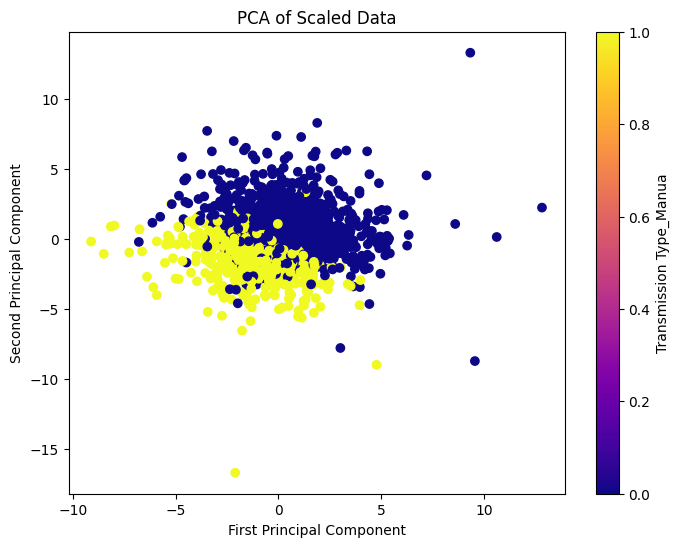

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=data["Transmission Type_Manual"], cmap="plasma")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.colorbar(label="Transmission Type_Manua")
plt.title("PCA of Scaled Data")
plt.show()

In [23]:
explained_variance=pca.explained_variance_ratio_

In [24]:
explained_variance

array([9.24566656e-04, 9.08868217e-04, 9.00963574e-04, ...,
       2.78275427e-04, 2.94234284e-06, 3.24357867e-31])

Text(0.5, 1.0, 'Scree Plot')

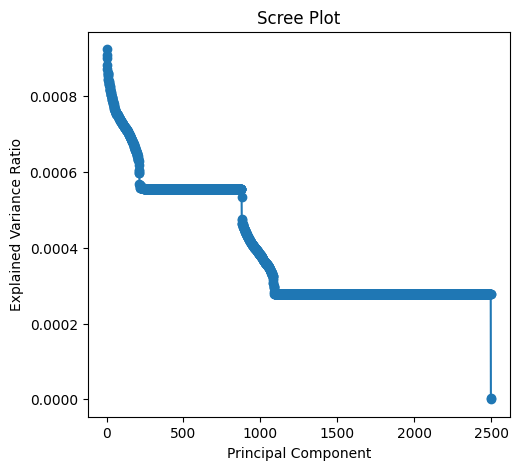

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(
    range(1, len(explained_variance) + 1), explained_variance, marker="o"
)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")

- the visualization indicate that a large portion of variance is captured by the 1st few hundred components.
- the flat part indicates that the 1st principal component  stop contributing significantly to explain the variance.

In [28]:
cumsum=np.cumsum(explained_variance)
cumsum

array([9.24566656e-04, 1.83343487e-03, 2.73439845e-03, ...,
       9.99997058e-01, 1.00000000e+00, 1.00000000e+00])

Text(0.5, 1.0, 'Cumulative Explained Variance Plot')

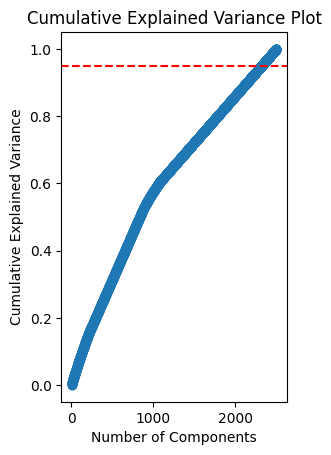

In [27]:
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumsum) + 1), cumsum, marker="o")
plt.axhline(y=0.95, color="r", linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Plot")